# Stock Trades by Members of the US House of Representatives

This project uses public data about the stock trades made by members of the US House of Representatives. This data is collected and maintained by Timothy Carambat as part of the [House Stock Watcher](https://housestockwatcher.com/) project. The project describes itself as follows:

> With recent and ongoing investigations of incumbent congressional members being investigated for potentially violating the STOCK act. This website compiles this publicly available information in a format that is easier to digest then the original PDF source.
>
> Members of Congress must report periodic reports of their asset transactions. This website is purely for an informative purpose and aid in transparency.
>
> This site does not manipluate or censor any of the information from the original source. All data is transcribed by our community of contributors, which you can join for free by going to our transcription tool. Our moderation team takes great care in ensuring the accuracy of the information.
>
> This site is built and maintained by Timothy Carambat and supported with our contributors.

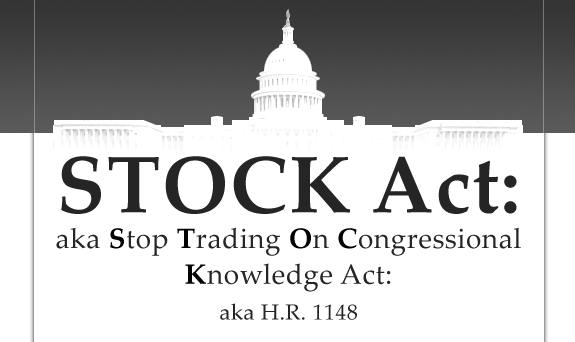

# Question: is there evidence of insider trading amongst members of congress?
### More specifically, did members of congress sell Boeing stock at suspiciously high amounts prior to its crash in Feb 2020?

### Getting the Data

The full data set of stock trade disclosures is available as a CSV or as JSON at https://housestockwatcher.com/api.

This data set does not, however, contain the political affiliation of the congresspeople. If one wishes to investigate a question that relies on having this information, one would need to find another dataset that contains it and perform a merge.

# Summary of Findings

### Introduction
In 2012, the STOCK act was passed to prevent insider trading and conflicts of interest. The act requires members of congress to disclose all stock sales/purchases made by them or their dependents (spouse, children, etc). In 2020, however, 45 members of congress violated this act by either failing to disclose or disclosing past the deadline. 

In Feb 2020, the price of Boeing shares, an aerospace company, fell by 13.6%. Some members of congress own Boeing stock. In this project, I examine whether the Boeing stock was sold in suspiciously high amounts by members of congress prior to the crash. 

This dataset contains the disclosed sales/purchases of members of congress and their dependents, the stock that was sold/purchased, the type of transaction (sale/purchase), who made the transaction (a member of congress or their dependent), the date the transaction was made, the date the transaction was disclosed, and other information.

### Cleaning and EDA
A little under half of the ownership information was missing, a little under 10% of the stock ticker name was missing, though one could find the name of the company in the description of the asset, of which only 4 values were missing, it would be more difficult to perform analyses on the data without the ticker information since one might not care what type of asset it is when performing analysis but would only care about the asset's company.

Most of the missing values were denoted as '--' to which I replaced with NaN. Additionally, some transaction dates were incorrect, such as 0009 instead of 2009, or 0201 instead of, likely, 2021. Furthermore, some company names were incorrect, such as "The Boring Company" instead of "The Boeing Company." Such cases were reformatted and dealt with using intuition and domain knowledge. For example, Elon Musk's "The Boring Company" is not publicly listed, and the name closest to it is "The Boeing Company," which is consistent with the rest of the congress member's transactions of the Boeing stock. 

### Assessment of Missingness
Permutation tests were performed on different combinations of the three columns that contained missingness (owner, ticker, asset_description) vs every other column to investigate whether the missingess of any given column was dependent on the other. In all cases, the evidence suggested that there was no dependence, and the missingess was Missing Completely at Random. 

It is important to note that one could simply impute the missingess of the ticker column using the asset description. For example, if a given row had a missing ticker, but the asset description for that row was "BlackRock Inc," one would infer that the ticker is just "BLK." And since there are no instances where both the ticker and the asset description is missing, then imputation is possible for every instance of a missing ticker.

Although I haven't found one, it would be interesting to find if there was some pattern to the missingess of the owner column with something else that isn't present in this data set. For example, if I were to have brought a different data set containing the political affiliation of each congress member, I could have explored if a given congress member's failure to disclose whether it was them or their dependent who made the transaction is dependent on whether they are a democrat or a republican (MAR). 

### Hypothesis Test
The Null Hypothesis is that there was no suspiciously high number of sales of the Boeing stock prior to the crash in Feb 2020. The Alternative Hypothesis is that the sales were suspiciously high. The test statistic was the difference in means before vs after the price crash. The formula for the mean would be the average number of stocks per day in a given time period. The significance level was 5%. 

After performing the hypothesis test, the p-value supported the alternative hypothesis.

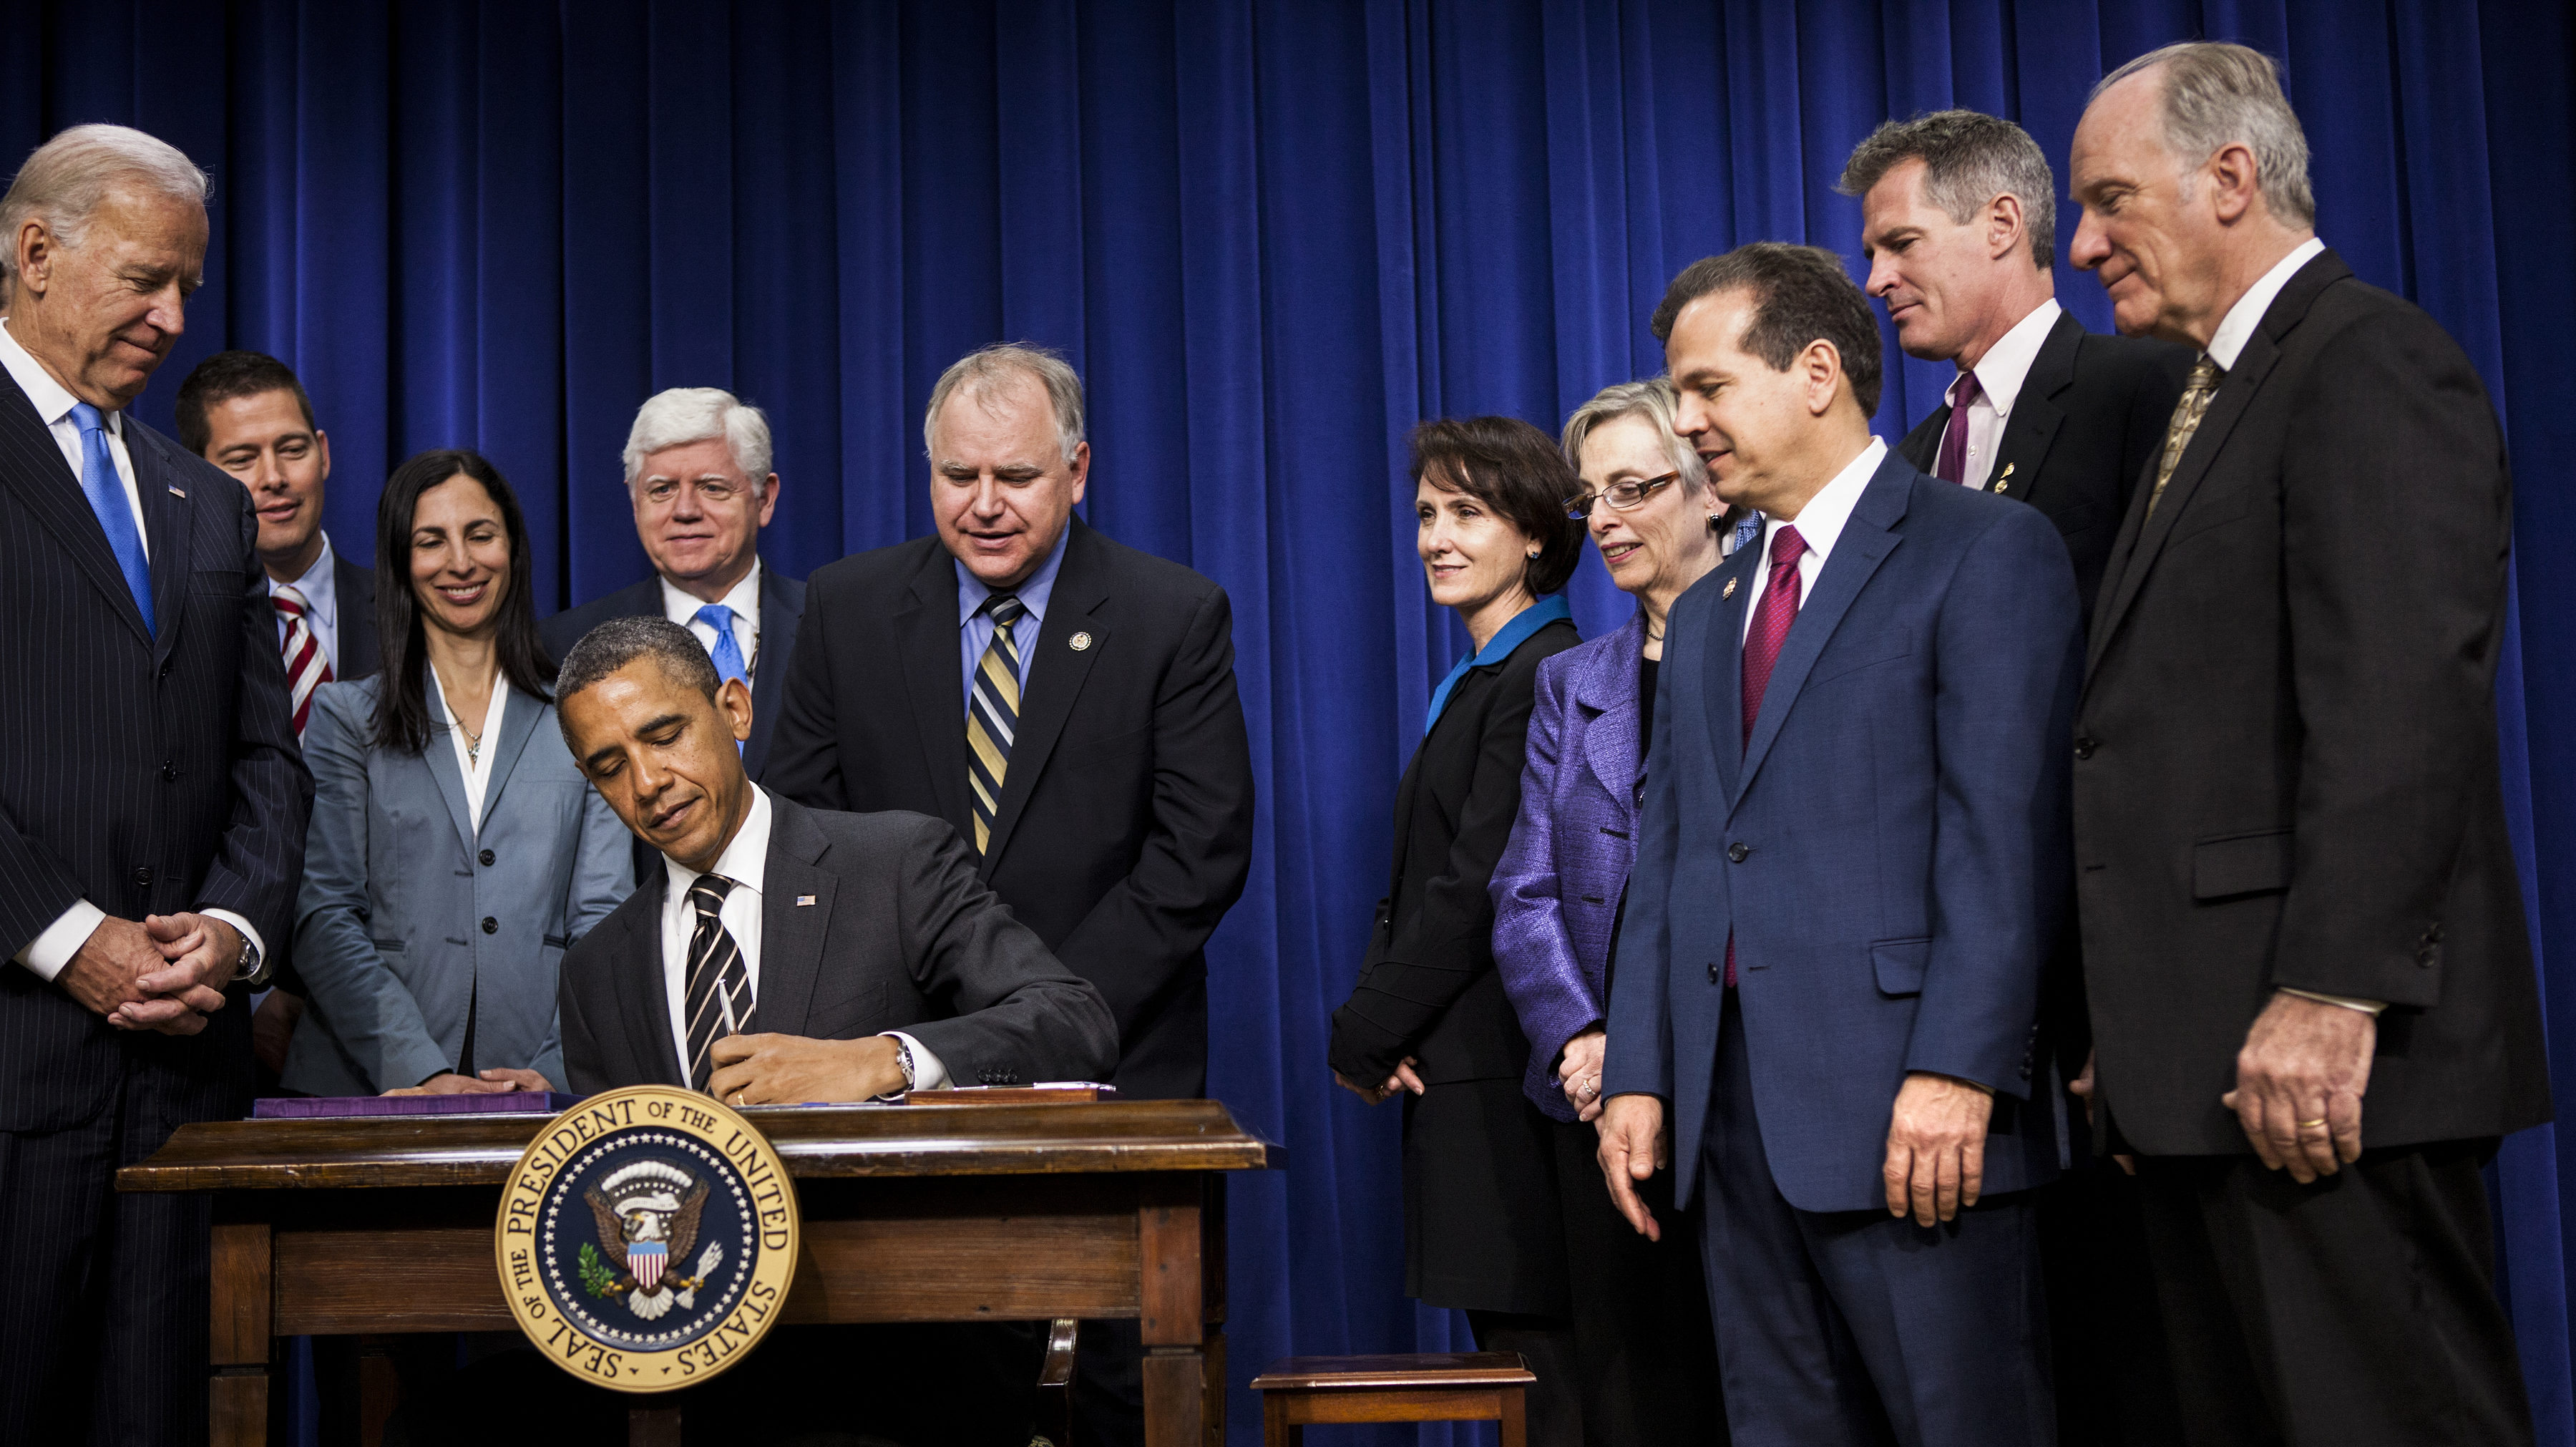
Vice President Biden and members of Congress watch as President Obama signs the STOCK Act on April 4, 2012. A year later, Congress moved to undo large portions of the law.
###### Source: Brendan Smialowski/AFP/Getty Images

# Code

In [406]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

### Cleaning and EDA

#### Load data

In [407]:
df = pd.read_csv('data/all_transactions.csv')
df.head()

,disclosure_year,disclosure_date,transaction_date,owner,ticker,asset_description,type,amount,representative,district,ptr_link,cap_gains_over_200_usd
0,2021,10/04/2021,2021-09-27,joint,BP,BP plc,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
1,2021,10/04/2021,2021-09-13,joint,XOM,Exxon Mobil Corporation,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
2,2021,10/04/2021,2021-09-10,joint,ILPT,Industrial Logistics Properties Trust - Common...,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
3,2021,10/04/2021,2021-09-28,joint,PM,Phillip Morris International Inc,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
4,2021,10/04/2021,2021-09-17,self,BLK,BlackRock Inc,sale_partial,"$1,001 - $15,000",Hon. Alan S. Lowenthal,CA47,https://disclosures-clerk.house.gov/public_dis...,False


#### Clean data

In [501]:
print('\n', 'The number of duplicates are:', df[df.duplicated()].shape[0])
df[df.duplicated()].head()


 The number of duplicates are: 463


,disclosure_year,disclosure_date,transaction_date,owner,ticker,asset_description,type,amount,representative,district,ptr_link,cap_gains_over_200_usd
98,2021,2021-02-25,2021-01-05,self,NaN,Triborough Brdg & Tunl Auth N,sale_full,"$1,001 - $15,000",Hon. Michael T. McCaul,TX10,https://disclosures-clerk.house.gov/public_dis...,False
130,2021,2021-02-25,2021-01-05,dependent,NaN,Triborough Brdg & Tunl Auth N,sale_full,"$1,001 - $15,000",Hon. Michael T. McCaul,TX10,https://disclosures-clerk.house.gov/public_dis...,False
280,2020,2021-01-07,2020-11-03,self,MU,MICRON TECHNOLOGY INC,purchase,"$1,001 - $15,000",Hon. Michael T. McCaul,TX10,https://disclosures-clerk.house.gov/public_dis...,False
315,2020,2021-01-07,2020-11-03,dependent,MCRN,MICRON TECHNOLOGY INC,purchase,"$1,001 - $15,000",Hon. Michael T. McCaul,TX10,https://disclosures-clerk.house.gov/public_dis...,False
373,2021,2021-03-02,2021-02-08,self,CLNE,Clean Energy Fuels Corp,purchase,"$1,001 - $15,000",Hon. Katherine M. Clark,MA05,https://disclosures-clerk.house.gov/public_dis...,False


Note: I choose not to drop duplicates because my interpretation of the presence of duplicates is that it's possible that a member of congress bought a certain stock multiple times in a single day. For example, it is possible that Congressman Michael McCaul bough Triborough stock at 8am on 2021-01-05, then again at 5pm. This would lead to duplicate rows but seperate transactions. Also, even if duplicates were actually a product of a data generating issue, and no congress member bought the same stock multiple times in the same day, then it is okay to not drop because there are only 463 duplicates, which is just 3.7% of the data.

Owner and ticker columns have missing values denoted as '--'

In [409]:
df[['owner', 'ticker']].value_counts()

owner  ticker
self   --        317
joint  --        287
       MSFT      111
       TDDXX     111
self   RUN        93
                ... 
joint  MFC         1
       MET         1
--     SLG         1
       SNP         1
joint  GIS         1
Length: 2368, dtype: int64

Replace '--' with NaN

In [410]:
# handle missing values
def convert_to_null(cell):
    if cell == '--':
        return np.nan
    else:
        return cell

# loop through columns that are str and apply helper function
for column in df.columns:
    if df[column].dtype == object:
        df[column] = df[column].apply(convert_to_null)

df[['owner', 'ticker']].value_counts()

owner  ticker
joint  MSFT      111
       TDDXX     111
self   RUN        93
       NTAP       81
       AAPL       41
                ... 
joint  OXY         1
       PAGS        1
       PAHC        1
       PANW        1
       PSO         1
Length: 1716, dtype: int64

In [411]:
# Since some transactions have dates in the form of 0009 instead of 2009, I replace the 0 with 2
# I also hard-coded to handle a case in which the transaction year was 0201, which I assumed to be 2021 since that's 
# the most common year in the dataset
def transaction_cleaner(cell):
    if cell.split('-')[0] == '0201':
        return '2021' + cell[4:]
    elif cell[0] != '2':
        return '2' + cell[1:]
    else:
        return cell
        
df['transaction_date'] = df['transaction_date'].apply(transaction_cleaner)

# Turn date columns to timeseries
df['disclosure_date'] = pd.to_datetime(df['disclosure_date'])
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

times = df[['disclosure_date', 'transaction_date']]
print(times.dtypes)
times.head()

disclosure_date     datetime64[ns]
transaction_date    datetime64[ns]
dtype: object


,disclosure_date,transaction_date
0,2021-10-04,2021-09-27
1,2021-10-04,2021-09-13
2,2021-10-04,2021-09-10
3,2021-10-04,2021-09-28
4,2021-10-04,2021-09-17


Note: there are some minor mistakes in the company names. For example, there is "Boring Company" instead of "Boeing Company." It is safe to assume that this is a mistake because The Boring Company is not publicly listed. I chose to not handle these mistakes because 1) they are very rare and don't affect any calculations, 2) they are not relevant to the hypothesis test outcome since their ticker is the same

#### Describe data

In [412]:
print('Number of stock disclosures made my members of congress:', df.shape[0])
print('Number of companies whose stocks have been purchsed:', df.ticker.nunique())
print('Number of congress members:', df.representative.nunique(), '\n')
print(df.dtypes)

Number of stock disclosures made my members of congress: 12464
Number of companies whose stocks have been purchsed: 1945
Number of congress members: 169 

disclosure_year                    int64
disclosure_date           datetime64[ns]
transaction_date          datetime64[ns]
owner                             object
ticker                            object
asset_description                 object
type                              object
amount                            object
representative                    object
district                          object
ptr_link                          object
cap_gains_over_200_usd              bool
dtype: object


#### EDA

Note: although it is preferred to focus EDA on analysis relevant to the main question of whether there is evidence of insider trading of the Boeing stock around the time of the dip, I choose to explore the data set in other areas because 1) the highly categorical nature of the data and the high specificity of the question I'm tackling limit the number of ways I can perform EDA. 2) It is good practice to explore the data in different ways, just to get a better understanding.

#### Univariate Analysis

<AxesSubplot:title={'center':'Proportion of transactions made by members of congress from each state'}, ylabel='owner'>

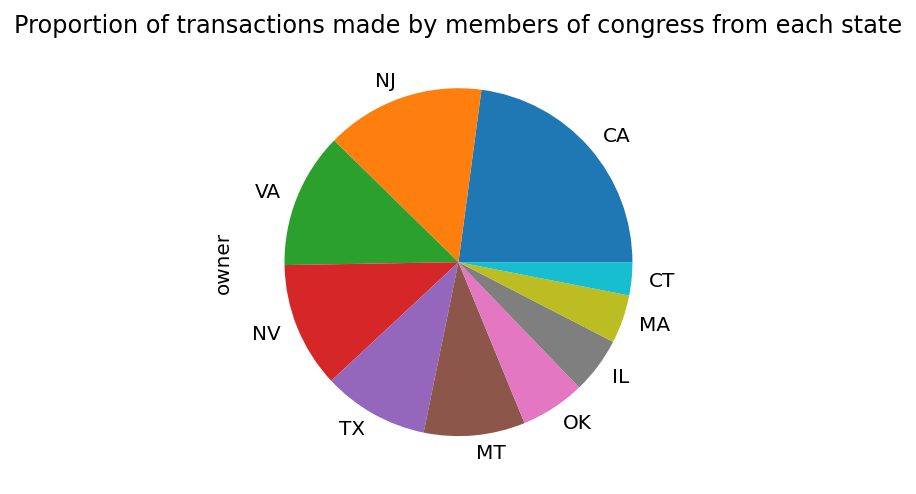

In [413]:
# Distribution of states
df_temp = df.copy()

# create new column meant to extract state code from district column
df_temp['state'] = df['district'].str[:2]
df_temp.groupby('state').count()['owner'].sort_values(ascending=False)[0:10].plot(kind='pie', title='Proportion of transactions made by members of congress from each state')

Note: although some districts in the dataset are classified as counties and not states, the number of those occurnces is small relative to the states, and don't cause much variation in the distribution of top states. Thus, I chose not to turn counties into states, because the purpose of this plot is simply to understand the data better

<AxesSubplot:title={'center':'Distribution of stock transactions based on whether it was made by a member of congress, their dependant, or some combination'}, ylabel='type'>

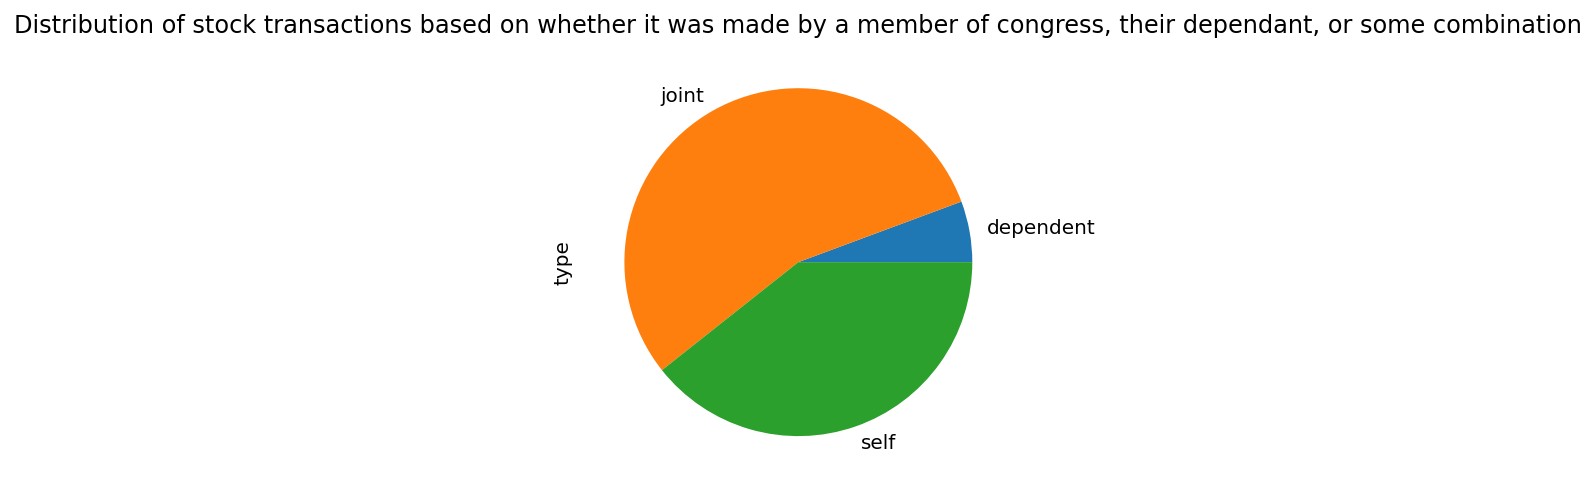

In [414]:
df_temp.groupby('owner').count()['type'].plot(kind='pie', title='Distribution of stock transactions based on whether it was made by a member of congress, their dependant, or some combination')

<AxesSubplot:title={'center':'Most commonly traded stocks by congress members'}, ylabel='ticker'>

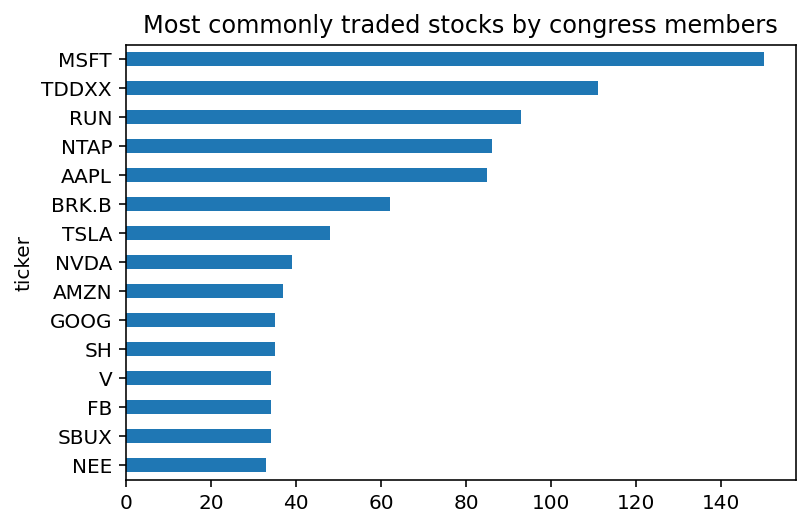

In [415]:
# Most traded companies
df.groupby('ticker').count()['owner'].sort_values(ascending=True)[-15:].plot(kind='barh', title='Most commonly traded stocks by congress members')

#### Bivariate Analysis

Of all Boeing stock transactions, 7 were joint, 5 were made the congressmember themselves, but none from there dependents

In [417]:
df_Boeing = df[df['ticker'] == 'BA']
pd.pivot_table(df_Boeing, index = 'owner', aggfunc='count')['amount']

owner
joint    7
self     5
Name: amount, dtype: int64

This pivot table shows that for all transactions of the Boeing stock, there's not much to deduce from whether the transaction was made my the congress member themselves, their dependent, or some combination 

In [461]:
pd.pivot_table(df_Boeing, index='cap_gains_over_200_usd', columns='owner', values='type',aggfunc='count', fill_value=0)


owner,joint,self
cap_gains_over_200_usd,,
False,6,5
True,1,0


Stacked bar chart shows breakdown of ownership of transactions that were over 200$ in capital gains vs less

<AxesSubplot:xlabel='cap_gains_over_200_usd'>

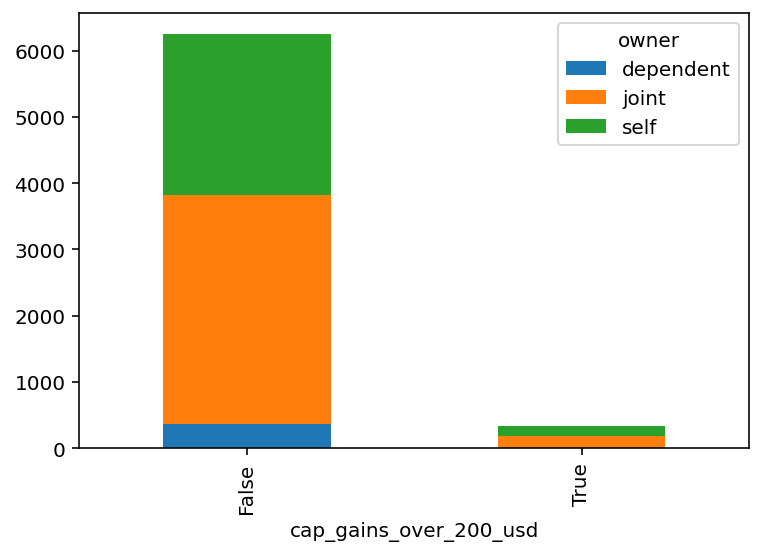

In [502]:
pd.pivot_table(df, index='cap_gains_over_200_usd', columns='owner', values='type',aggfunc='count', fill_value=0).plot.bar(stacked=True)


This pivot table shows that for Boeing stock transactions made by congress members, the ones where the capital gains were under 200 USD were mostly full sales. And for over 200, they were partial sales

In [430]:
pd.pivot_table(df_Boeing, index='cap_gains_over_200_usd', columns='type', values='owner',aggfunc='count', fill_value=0)


type,purchase,sale_full,sale_partial
cap_gains_over_200_usd,,,
False,3,5,3
True,0,0,1


Stacked bar chart shows breakdown of type of transactions that were over 200$ in capital gains vs less

<AxesSubplot:xlabel='cap_gains_over_200_usd'>

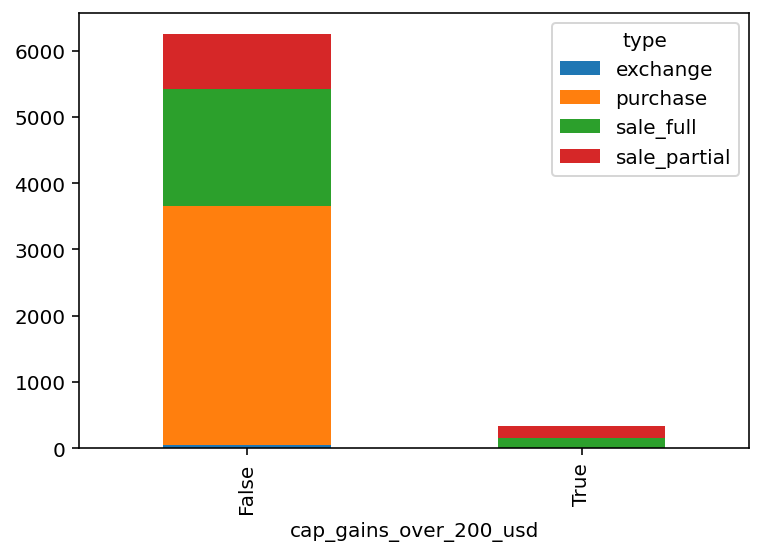

In [503]:
pd.pivot_table(df, index='cap_gains_over_200_usd', columns='type', values='owner',aggfunc='count', fill_value=0).plot.bar(stacked=True)


JUSTIFICATION: there is not enough data on Boeing stocks to make a useful plot, thus I stuck to pivot tables

#### Interesting Aggregates

This groupby shows that the vast majority of transactions were between 1,001 and 15,000 USD

In [437]:
df.groupby('amount')['type'].count()

amount
$1,000 - $15,000               4
$1,000,000 +                  26
$1,000,001 - $5,000,000       30
$1,001 -                     241
$1,001 - $15,000            8814
$100,001 - $250,000          488
$15,000 - $50,000              3
$15,001 - $50,000           1934
$250,001 - $500,000          182
$5,000,001 - $25,000,000       6
$50,000,000 +                  2
$50,001 - $100,000           624
$500,001 - $1,000,000        110
Name: type, dtype: int64

This groupby shows the proportion of stock transactions that belong in each bin where a bin is a range that the stock price is bounded by. For example, 0.155167 (~15.5%) of stocks in the data set are between 15,001 - 50,000 USD

In [506]:
df.groupby('amount')['type'].count() / df.groupby('amount')['type'].count().sum()

amount
$1,000 - $15,000            0.000321
$1,000,000 +                0.002086
$1,000,001 - $5,000,000     0.002407
$1,001 -                    0.019336
$1,001 - $15,000            0.707157
$100,001 - $250,000         0.039153
$15,000 - $50,000           0.000241
$15,001 - $50,000           0.155167
$250,001 - $500,000         0.014602
$5,000,001 - $25,000,000    0.000481
$50,000,000 +               0.000160
$50,001 - $100,000          0.050064
$500,001 - $1,000,000       0.008825
Name: type, dtype: float64

This groupby shows that congress members sold Boeing stock twice as much as purchasing it, which is consistent with the possibility of insider trading if the members knew that a dip in stock price was likely coming

In [439]:
df_Boeing.groupby('type').count()['transaction_date']

type
purchase        10
sale_full       14
sale_partial     6
Name: transaction_date, dtype: int64

This groupby shows that there weren't any dates where congress members traded Boeing stock at a more than regular amount, which makes one think there may not be any unusual activity, or members strategically spaced out there trade to hide any wrongdoing

In [445]:
# get number of Boeing stock trades per day, sort by number of days, found that there are only two possible values
df_Boeing.groupby('transaction_date')['ticker'].count().sort_values(ascending=False)[0:5]

transaction_date
2020-03-05    2
2020-04-09    2
2020-01-07    1
2020-08-10    1
2021-07-19    1
Name: ticker, dtype: int64

This groupby shows that the breakdown of Boeing stock traded is similar to the breakdown of ALL stocks traded, implying that there may not be any unusual activity

In [451]:
df_Boeing.groupby('amount').count()['transaction_date']

amount
$1,001 -                1
$1,001 - $15,000       22
$100,001 - $250,000     1
$15,001 - $50,000       6
Name: transaction_date, dtype: int64

This groupby shows the proportion of the Boeing stock transactions that belong in each bin where a bin is a range that the stock price is bounded by. For example, 0.20 (~20.0%) of Boeing stocks in the data set are between 15,001 - 50,000 USD

In [507]:
df_Boeing.groupby('amount').count()['transaction_date'] / df_Boeing.groupby('amount').count()['transaction_date'].sum()

amount
$1,001 -               0.033333
$1,001 - $15,000       0.733333
$100,001 - $250,000    0.033333
$15,001 - $50,000      0.200000
Name: transaction_date, dtype: float64

JUSTIFICATION: I only use counts and proportions for aggregates because the data is essentially entirely categorical. The lack of numerical data limits the amount of aggregating statistics that can be calculated

### Assessment of Missingness

Only three columns in the data contain missing values: 'owner', 'ticker', and 'asset_description'. Thus, one need only compare between owner vs every other column, ticker vs every other column, and asset_description vs every other column to indicate if there is a dependence.

In [493]:
data_copy = df.copy()
data_copy['owner_isnull'] = data_copy.owner.isnull()
data_copy['ticker_isnull'] = data_copy.ticker.isnull()
data_copy['asset_isnull'] = data_copy.asset_description.isnull()

data_copy[['owner', 'ticker','asset_description', 'owner_isnull', 'ticker_isnull', 'asset_isnull']].tail(7)

,owner,ticker,asset_description,owner_isnull,ticker_isnull,asset_isnull
12457,self,FB,"Facebook, Inc. - Class A",False,False,False
12458,self,KMI,"Kinder Morgan, Inc.",False,False,False
12459,NaN,SWK,"Stanley Black & Decker, Inc.",True,False,False
12460,NaN,USB,U.S. Bancorp,True,False,False
12461,NaN,BMY,Bristol-Myers Squibb Company,True,False,False
12462,NaN,LLY,Eli Lilly and Company,True,False,False
12463,NaN,DIS,Walt Disney Company,True,False,False


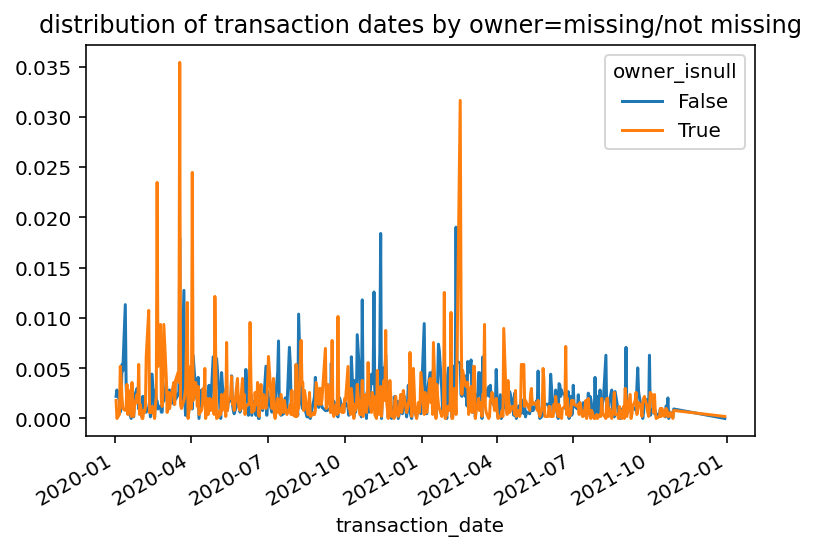

In [490]:
# plot null vs non null owner
relevant_data = data_copy[data_copy['transaction_date'] >= pd.to_datetime('2020-01-01')]
(
    relevant_data
    .pivot_table(index='transaction_date', columns='owner_isnull', values=None, aggfunc='size')
    .fillna(0)
    .apply(lambda x:x/x.sum())
    .plot(title='distribution of transaction dates by owner=missing/not missing')
);

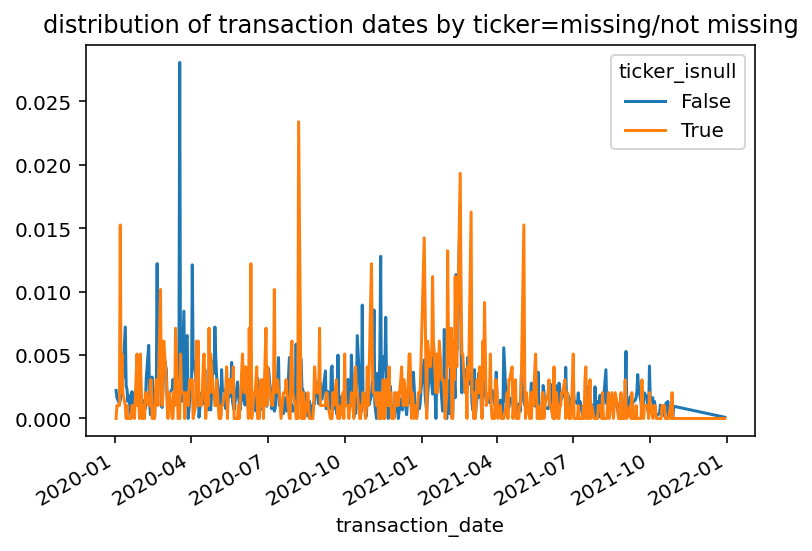

In [491]:
# plot null vs non null ticker
(
    relevant_data
    .pivot_table(index='transaction_date', columns='ticker_isnull', values=None, aggfunc='size')
    .fillna(0)
    .apply(lambda x:x/x.sum())
    .plot(title='distribution of transaction dates by ticker=missing/not missing')
);

#### MAR

Null Hypothesis: The missingess in the ticker column is NOT DEPENDENT on the Owner column

Alternative Hypothesis: The missingess in the ticker column IS DEPENDENT on the Owner column

Test Statistic: Total Variation Distance

Significane Level: 5%

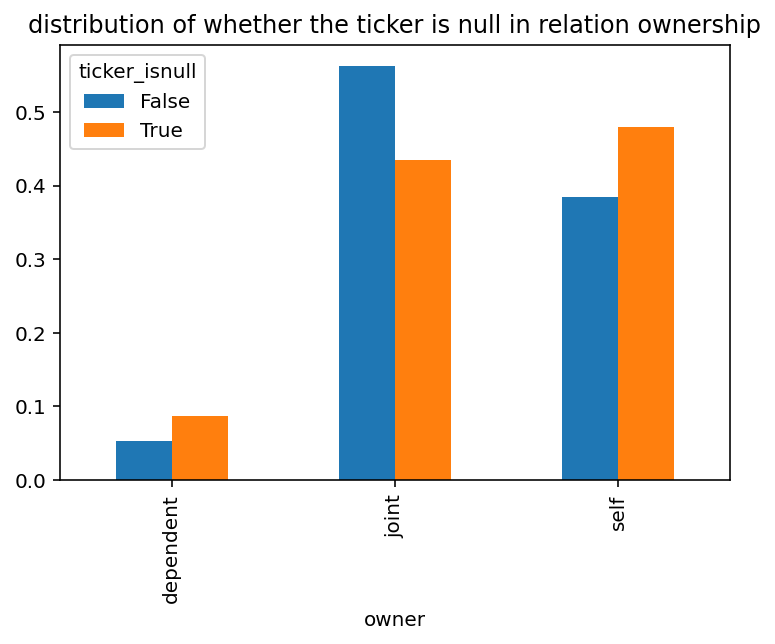

In [481]:
emp_distributions = (
    data_copy
    .pivot_table(columns='ticker_isnull', index='owner', values=None, aggfunc='size')
    .fillna(0)
    .apply(lambda x:x/x.sum())
)

emp_distributions.plot(kind='bar', title='distribution of whether the ticker is null in relation to ownership');

In [482]:
observed_tvd = np.sum(np.abs(emp_distributions.diff(axis=1).iloc[:,-1])) / 2
observed_tvd

0.1287311071230969

In [483]:
n_repetitions = 500

ticker_ownership = data_copy.copy()[['owner', 'ticker_isnull']]
tvds = []
for _ in range(n_repetitions):
    
    # shuffle the ownership
    shuffled_ownership = (
        ticker_ownership['owner']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    # put them in a table
    shuffled = (
        ticker_ownership
        .assign(**{'Shuffled Ownership': shuffled_ownership})
    )
    
    # compute the tvd
    shuffeled_emp_distributions = (
        shuffled
        .pivot_table(columns='ticker_isnull', index='Shuffled Ownership', values=None, aggfunc='size')
        .fillna(0)
        .apply(lambda x:x/x.sum())
    )
    
    tvd = np.sum(np.abs(shuffeled_emp_distributions.diff(axis=1).iloc[:,-1])) / 2
    # add it to the list of results
    
    tvds.append(tvd)

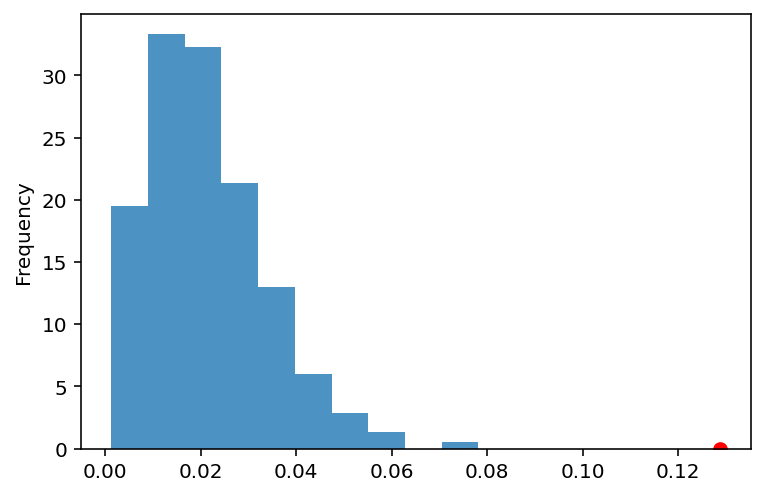

In [484]:
# visualize
pd.Series(tvds).plot(kind='hist', density=True, alpha=0.8)
plt.scatter(observed_tvd, 0, color='red', s=40);

#### p-value

In [487]:
np.count_nonzero(tvds <= observed_tvd) / len(tvds)

1.0

#### Conclusion

##### I fail to reject the Null Hypothesis — Ticker is NOT Missing at Random dependent on Owner. In fact, after enough tries with many different combinations of columns, it appears that none of the missingness of any given column is dependent on another. Therefore, there is no MAR.

#### MCAR

Null Hypothesis: The missigness in the asset_description column is NOT DEPENDENT on the Owner column.

Alternative Hypothesis: The missigness in the asset_description column IS DEPENDENT on the Owner column.

Test Statistic: Total Variation Distance

Significance Level: 5%

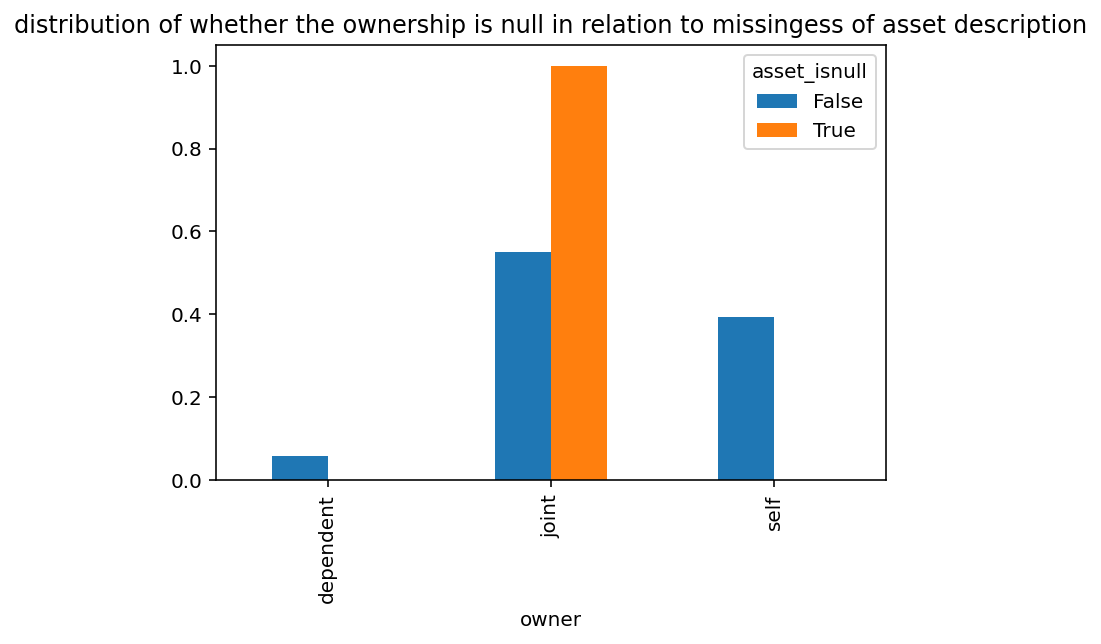

In [495]:
emp_distributions2 = (
    data_copy
    .pivot_table(columns='asset_isnull', index='owner', values=None, aggfunc='size')
    .fillna(0)
    .apply(lambda x:x/x.sum())
)

emp_distributions2.plot(kind='bar', title='distribution of whether the ownership is null in relation to missingess of asset description');

In [496]:
observed_tvd2 = np.sum(np.abs(emp_distributions2.diff(axis=1).iloc[:,-1])) / 2
observed_tvd2

0.4501290420525277

In [498]:
n_repetitions = 500

asset_ownership = data_copy.copy()[['owner', 'asset_isnull']]
tvds2 = []
for _ in range(n_repetitions):
    
    # shuffle the ownership
    shuffled_ownership2 = (
        asset_ownership['owner']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    # put them in a table
    shuffled2 = (
        asset_ownership
        .assign(**{'Shuffled Ownership': shuffled_ownership2})
    )
    
    # compute the tvd
    shuffeled_emp_distributions2 = (
        shuffled2
        .pivot_table(columns='asset_isnull', index='Shuffled Ownership', values=None, aggfunc='size')
        .fillna(0)
        .apply(lambda x:x/x.sum())
    )
    
    tvd2 = np.sum(np.abs(shuffeled_emp_distributions2.diff(axis=1).iloc[:,-1])) / 2
    # add it to the list of results
    
    tvds2.append(tvd2)

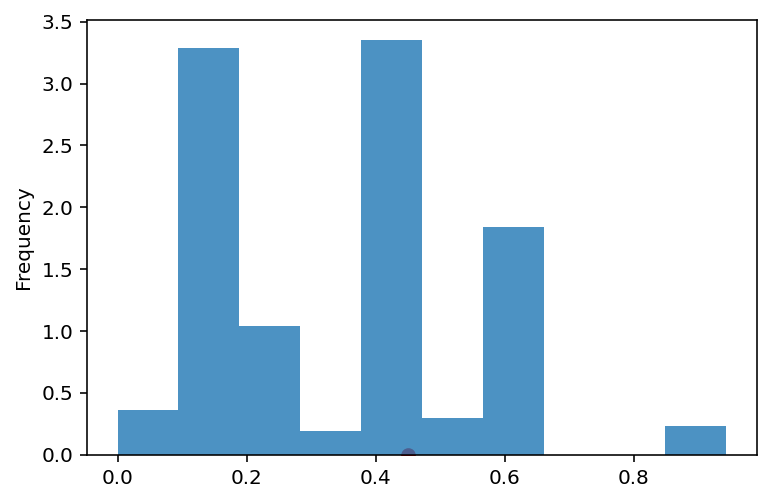

In [500]:
# visualize
pd.Series(tvds2).plot(kind='hist', density=True, alpha=0.8)
plt.scatter(observed_tvd2, 0, color='red', s=40);

#### p-value

In [499]:
np.count_nonzero(tvds2 <= observed_tvd2) / len(tvds2)

0.732

#### Conclusion

##### I fail to reject the Null Hypothesis — Asset description is likely Missing Completely at Random (it is not dependent on Owner or any other column). This is supported by the p-value.

### Hypothesis Test / Permutation Test

Null Hypothesis: the average number of times members of congress sold Boeing stock prior to the dip is the same as the average number of times they sold after the dip

Alternative Hypothesis: the average number of times members of congress sold Boeing stock prior to the dip is greater than the average number of times they sold after the dip

Test Statistic: (avg number of times congress sold Boeing stock before dip) - (avg number of times congress sold Boeing stock after dip)

Significane Level: 5%

JUSTIFICATION: the framing of the null hypothesis and the alternative hypothesis are good choices because if one wanted to understand if sales were suspiciously high before a stock crash, one would need to have a relative baseline to compare it to. The assumption is that since there have been no dramatic rises or crashes in the Boeing stock since the crash in Fe 2020, traders of the stock who had no insider knowledge of whether the stock is likely to crash would behave similarly before the crash (since they wouldn't know a crash is coming) and after the crash.

As for the test statistic, since the number of transactions we have before the dip are far less than the number of transactions after, scaling the number is needed. This is done using a time scale (average number of stocks sold per day). This could have been done using week or month, which would have made more sense because stock trades typically occur over months and not days (most congress members aren't day traders). However, the p-value calculation would have been the same, and ease of implementation warranted the use of number of days.

Finally, for the significance level, choosing 5% was simply due to convention.

#### Sample computation of test statistic

In [376]:
# get subset of dataframe where we only have the sales of the boeing stock
boeing = df[(df['ticker'] == 'BA') & (boeing['type'].str.contains('sale') == True)].sort_values(by=['transaction_date'])

# split boeing dataframe into all transactions before the dip and after the dip
boeing_before_dip = boeing[boeing['transaction_date'] <= pd.to_datetime('2020-02-21')]
boeing_after_dip = boeing[boeing['transaction_date'] > pd.to_datetime('2020-02-21')]

# our desired test statistic is difference of mean number of boeing stock sold before vs after dip
# mean = number of stocks sold (before/after) the dip / number of days (before/since) the dip
num_days_before = (boeing_before_dip['transaction_date'].iloc[-1] - boeing_before_dip['transaction_date'].iloc[0]).days
num_days_after = (boeing_after_dip['transaction_date'].iloc[-1] - boeing_after_dip['transaction_date'].iloc[0]).days

# compute test statistic
mean_before = boeing_before_dip.shape[0] / num_days_before
mean_after = boeing_after_dip.shape[0] / num_days_after
print('average number of boeing stock sold before the dip is', mean_before, 'stocks per day')
print('average number of boeing stock sold after the dip is', mean_after, 'stocks per day\n')
diff_of_means = mean_before - mean_after
print('The difference in means is', diff_of_means)

average number of boeing stock sold before the dip is 0.12903225806451613 stocks per day
average number of boeing stock sold after the dip is 0.02768166089965398 stocks per day

The difference in means is 0.10135059716486214


#### Implement Hypothesis Test

Create a helper function for computing the test statistic, simulating the null hypothesis, and computing the p-value

In [372]:
def test_statistic(df):
    # get subset of dataframe where we only have the sales of the boeing stock
    boeing = df[(df['ticker'] == 'BA') & (df['type'].str.contains('sale') == True)].sort_values(by=['transaction_date'])

    # split boeing dataframe into all transactions before the dip and after the dip
    boeing_before_dip = boeing[boeing['transaction_date'] <= pd.to_datetime('2020-02-21')]
    boeing_after_dip = boeing[boeing['transaction_date'] > pd.to_datetime('2020-02-21')]
    
    # handle case when shuffling leads to no sales before the dip
    if boeing_before_dip.shape[0] != 0:
        # our desired test statistic is difference of mean number of boeing stock sold before vs after dip
        # mean = number of stocks sold (before/after) the dip / number of days (before/since) the dip
        num_days_before = (boeing_before_dip['transaction_date'].iloc[-1] - boeing_before_dip['transaction_date'].iloc[0]).days
        num_days_after = (boeing_after_dip['transaction_date'].iloc[-1] - boeing_after_dip['transaction_date'].iloc[0]).days
    else:
        num_days_before = 0
        num_days_after = (boeing_after_dip['transaction_date'].iloc[-1] - boeing_after_dip['transaction_date'].iloc[0]).days

    if num_days_before == 0:
        return 0 - (boeing_after_dip.shape[0] / num_days_after)
    
    
    # compute test statistic
    mean_before = boeing_before_dip.shape[0] / num_days_before
    mean_after = boeing_after_dip.shape[0] / num_days_after
    
    diff_of_means = mean_before - mean_after
    return diff_of_means

def simulate_null(df):
    df_copy = df.copy()
    shuffled_data = df_copy['transaction_date'].sample(replace=False, frac=1).reset_index(drop=True)
    df_copy['transaction_date'] = shuffled_data
    return test_statistic(df_copy)

def calculate_pval(df):
    permutations = []
    n_repititions = 1000
    df_copy = df.copy()

    obs = test_statistic(df_copy)

    for i in range(n_repititions):
        permutations.append(simulate_null(df_copy))

    greater = [i for i in permutations if i > obs]    
    return pd.Series(len(greater) / len(permutations))[0]
   

#### Calculate the p-value

In [373]:
calculate_pval(df)

0.047

## Conclusion

##### I reject the null hypothesis — The p-value is less than the significane level (alpha = 0.05), therefore there is evidence to suggest that sales of the Boeing stock made by members of congress prior to the crash are more frequent than they normally are. Although causality cannot be determined, we can say that the difference is likely NOT due to random chance.

##### In other words, based on the evidence brought about by this hypothesis test, it cannot be ruled out that there was insider trading of the Boeing stock done by members of congress. HOWEVER, a randomized control expirement would be necessary to determine causality. 